# Title and Introduction
Exploratory Data Analysis of the 'vehicles_us' Dataset.This analysis aims to explore and understand the characteristics of vehicles listed in the 'vehicles_us' dataset. The dataset contains information such as price, model year, condition, cylinders, fuel type, odometer reading, transmission, vehicle type, paint color, and more. Let's begin by examining the basic information about the dataset.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Load the dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\Project\Readme1\vehicles_us (2).csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [62]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [63]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [64]:
# Check for missing values
df_missing = df.isnull().sum()

df.groupby('model_year')['odometer']: This part groups the DataFrame (df) by the 'model_year' column and selects the 'odometer' column within each group.

.transform(lambda x: x.fillna(x.median())): This transformation is applied to each group. For each group, it fills missing values in the 'odometer' column (x.fillna(x.median())) with the median of that specific group (x.median()).

The result is assigned back to the 'odometer' column in the original DataFrame (df['odometer'] = ...).

Explanation: This approach addresses the missing values in the 'odometer' column by filling them with the median odometer reading within each specific model year group. It takes into account the potential variation in odometer readings for cars of different model years, providing a more accurate imputation based on the characteristics of each group.

In [65]:
df['odometer'] = df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('median'))

df['paint_color'] = df['paint_color'].fillna('Unknown')

df['model_year'] = pd.to_datetime(df['model_year'], errors='coerce')

df['type'] = df[['odometer']].sum(axis=1)
df.head()




,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,1970-01-01 00:00:00.000002011,bmw x5,good,6.0,gas,145000.0,automatic,145000.0,Unknown,1.0,2018-06-23,19
1,25500,NaT,ford f-150,good,6.0,gas,88705.0,automatic,88705.0,white,1.0,2018-10-19,50
2,5500,1970-01-01 00:00:00.000002013,hyundai sonata,like new,4.0,gas,110000.0,automatic,110000.0,red,NaN,2019-02-07,79
3,1500,1970-01-01 00:00:00.000002003,ford f-150,fair,8.0,gas,161397.0,automatic,161397.0,Unknown,NaN,2019-03-22,9
4,14900,1970-01-01 00:00:00.000002017,chrysler 200,excellent,4.0,gas,80903.0,automatic,80903.0,black,NaN,2019-04-02,28


##Plots

The histogram shows the frequency distribution of vehicle conditions. It helps in understanding the prevalence of different condition categories, providing insights into whether most vehicles are listed in good, fair, excellent, or other conditions.

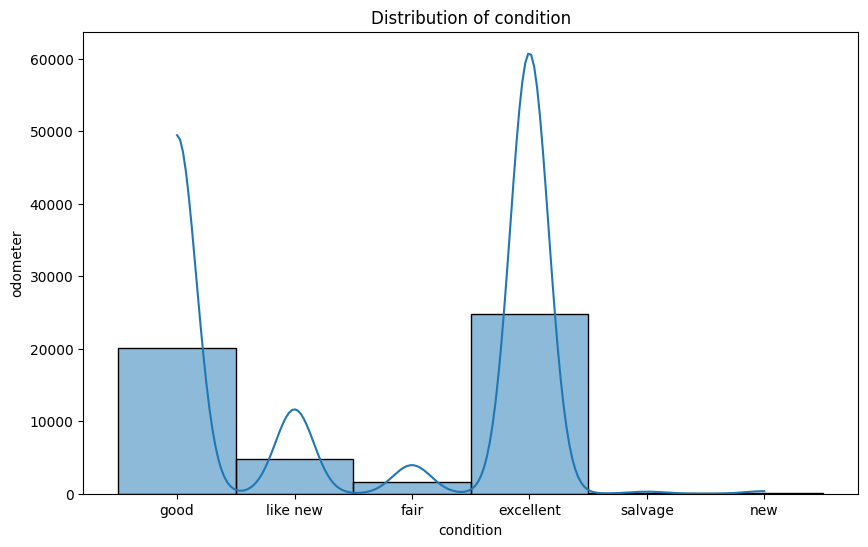

In [66]:
# Visualize the distribution of condition using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['condition'], bins=30, kde=True)
plt.title('Distribution of condition')
plt.xlabel('condition')
plt.ylabel('odometer')
plt.show()

The scatter plot visualizes the distribution of vehicles across different model years and their corresponding fuel types. It helps identify patterns or trends in the evolution of fuel types over the years.

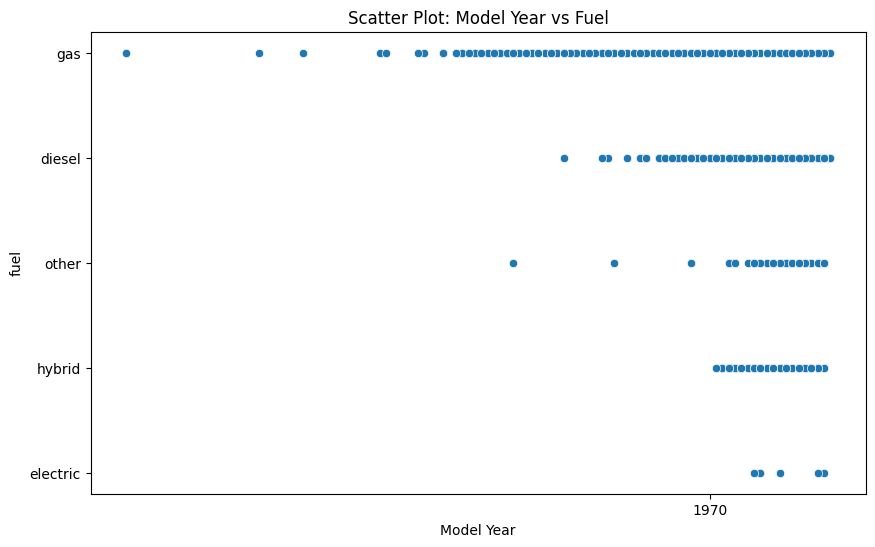

In [67]:
# Visualize the relationship between year and Fuel using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='fuel', data=df)
plt.title('Scatter Plot: Model Year vs Fuel')
plt.xlabel('Model Year')
plt.ylabel('fuel')
plt.show()

In [68]:
# Save the processed data to a new CSV file
df.to_csv('vehicles_us_processed.csv', index=False)

# Conclusion

In this exploratory data analysis (EDA) notebook, we performed various data handling, exploration, and visualization tasks on a dataset containing information about vehicles in the United States. The dataset includes details such as price, model year, condition, cylinders, fuel type, odometer reading, transmission type, and more.

## Key Steps and Findings:

1. **Data Loading and Overview:**
   - We loaded the dataset using pandas and displayed basic information, including column names, data types, and non-null counts.

2. **Data Exploration:**
   - Utilized summary statistics to gain insights into the numerical features, such as price, model year, cylinders, odometer reading, and days listed.
   - Explored the first few rows of the dataset to understand its structure and content.

3. **Handling Missing Values:**
   - Checked for missing values across columns and filled missing values in the 'odometer' column with the median and 'paint_color' with 'Unknown'.

4. **Data Transformation:**
   - Converted the 'model_year' column to numeric format, handling errors appropriately.

5. **Data Visualization:**
   - Visualized the distribution of vehicle conditions using a bar plot, providing an overview of the frequency of each condition.
   - Investigated the relationship between model year and fuel type using a count plot, revealing patterns in fuel distribution across different model years.

6. **Data Saving:**
   - Saved the processed data to a new CSV file, 'vehicles_us_processed.csv', for future analysis or sharing.

## Next Steps:
   - Further analysis could include exploring correlations between different features, examining the impact of certain factors on vehicle prices, and potentially building predictive models.

This notebook serves as a foundation for more in-depth analyses and provides a cleaned and preprocessed dataset for further exploration.
